<a href="https://colab.research.google.com/github/TanzinaS/Brigde-up/blob/master/Unit5_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BridgeUP_year1/Unit5_PaleoNeuroscience/bird_dino_data.csv")

In [ ]:
bird = df.loc[df["Bird vs Dino"] == "B"]
dino = df.loc[df["Bird vs Dino"] == "D"]
bird.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Brain Volume (cm3)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.96
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.04
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.10
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.19
7,8,B,0.90,0.234,5.95,0.99,0.96,0.55,8.68


In [ ]:
def BB(animal, brain, body): #finds brain to body ratio
  brain = animal[brain]
  body = animal[body]
  average = (brain/body)/1000
  return average.mean()

In [ ]:
bird_BBratio = BB(bird, "Brain Volume (cm3)", "Body Mass (kg)")
print("bird", bird_BBratio)
dino_BBratio = BB(dino, "Brain Volume (cm3)", "Body Mass (kg)")
print("dino", dino_BBratio)

bird 0.047832283820074345
dino 0.0016106496539985663


<BarContainer object of 2 artists>

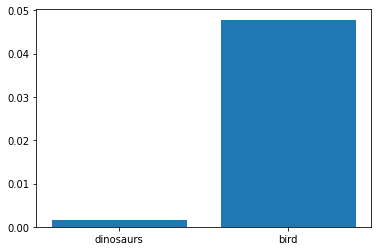

In [ ]:
name = ["dinosaurs", "bird"]
data = [dino_BBratio, bird_BBratio]
plt.bar(name, data)

In [ ]:
def CB(animal): #cerebrum to whole brain ratio
  cerebrum = animal["Cerebrum (cm3)"]
  whole_brain = animal["Brain Volume (cm3)"]
  brain_ratio = cerebrum/whole_brain
  return brain_ratio.mean()

In [ ]:
bird_CBratio = CB(bird)
print("bird", bird_CBratio)
dino_CBratio = CB(dino)
print("dino", dino_CBratio)

bird 0.6649507745281171
dino 0.4695339305450895


In [ ]:
def prediction(femur_l, brain_v, cereb_w):
  body_mass = 10**(3.1854*np.log10(femur_l)-3.184)/1000 #calculates body mass using femur length

  BB_ratio = (brain_v/body_mass)/1000 #calculates brain to body mass ratio
  CB_ratio = cereb_w/brain_v #calculates cerebrum to whole brain ratio
  diff_BBratio_bird = BB_ratio - bird_BBratio
  diff_CBratio_bird = CB_ratio - bird_CBratio
  diff_BBratio_dino = BB_ratio - dino_BBratio
  diff_CBratio_dino = CB_ratio - dino_CBratio

  if diff_BBratio_bird < diff_BBratio_dino:
    answer = "bird"
  elif diff_BBratio_bird > diff_BBratio_dino:
    answer = "dino"

  if diff_CBratio_bird > diff_CBratio_dino:
    answer_2 = "dino"
  elif diff_CBratio_bird < diff_CBratio_dino:
    answer_2 = "bird"
  
  return answer, answer_2

In [ ]:
prediction(70, 1.44, 0.6)

('bird', 'bird')